<a href="https://colab.research.google.com/github/DhanashreeAmbekar/Deep-Learning/blob/main/Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Multiclass Classification

In [81]:
from warnings import filterwarnings
filterwarnings("ignore")

In [82]:
url1="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv


In [83]:
import pandas as pd
df=pd.read_csv(url1)
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


Step 2- basic quality check

In [84]:
df.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [85]:
df.duplicated().sum()

0

### Step 3- Seperate X and Y

In [86]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [87]:
X=df.drop(columns=["Weather Type"])
Y=df[["Weather Type"]]

In [88]:
Y.value_counts()

,count
Weather Type,
Cloudy,3300
Rainy,3300
Snowy,3300
Sunny,3300


In [89]:
Y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


<Axes: xlabel='Weather Type'>

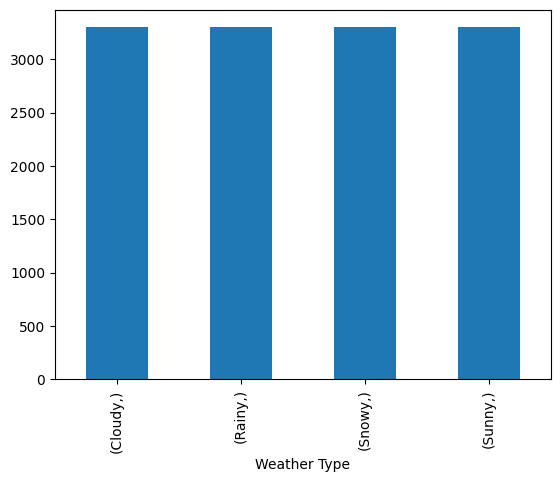

In [90]:
Y.value_counts().plot(kind="bar")

### Apply Preprocessing on X

In [91]:
X.dtypes

,0
Temperature,float64
Humidity,int64
Wind Speed,float64
Precipitation (%),float64
Cloud Cover,object
Atmospheric Pressure,float64
UV Index,int64
Season,object
Visibility (km),float64
Location,object


In [92]:
cat=list(X.columns[X.dtypes=="object"])
con=list(X.columns[X.dtypes!="object"])

In [93]:
from sklearn .pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [94]:
num_pipe=make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [95]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown= "ignore", sparse_output=False)
)

In [96]:
pre= ColumnTransformer(
    [
        ("num",num_pipe,con),
        ("cat",cat_pipe,cat)
    ]
).set_output(transform="pandas")

In [97]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Step 5- Train Test Split

In [98]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [99]:
xtrain.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
3958,0.740404,-0.134243,-0.554712,1.200664,0.117804,-0.520104,-1.175461,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2239,-0.237413,1.351385,0.169040,0.105042,0.299802,-1.038715,-0.433923,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3608,0.510330,-0.530410,-0.482337,-1.334918,0.525351,1.554340,1.049153,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6848,1.603184,0.757134,5.018179,0.981540,-0.364746,-0.520104,-1.027154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6119,-0.064857,-0.134243,0.603291,-1.366221,-0.155596,-0.779410,0.752538,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [100]:
ytrain.head()

,Weather Type
3958,Rainy
2239,Rainy
3608,Sunny
6848,Rainy
6119,Cloudy


In [101]:
xtest.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
4111,0.222737,-1.520829,-0.771838,-1.491435,0.412980,1.295035,1.345768,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10607,2.465964,1.252343,0.675666,0.918933,0.530728,1.554340,-0.433923,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7372,1.200553,-0.877057,-1.133714,-1.303614,0.519437,1.035729,0.752538,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11786,-1.502823,0.509529,-0.482337,1.138057,-0.329798,-1.038715,-1.175461,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12227,0.107699,1.252343,0.024290,1.732823,0.588257,1.813646,1.049153,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [102]:
ytest.head()

,Weather Type
4111,Sunny
10607,Sunny
7372,Sunny
11786,Snowy
12227,Sunny


In [103]:
xtrain.shape

(10560, 18)

In [104]:
xtest.shape

(2640, 18)

### For multiclass classification apply OneHotEncoding on Y

In [105]:
ohe = OneHotEncoder(
    handle_unknown="ignore", sparse_output= False
).set_output(transform ="pandas")

In [106]:
ytrain_pre = ohe.fit_transform(ytrain)
ytest_pre = ohe.transform(ytest)

In [107]:
ytrain_pre

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
3958,0.0,1.0,0.0,0.0
2239,0.0,1.0,0.0,0.0
3608,0.0,0.0,0.0,1.0
6848,0.0,1.0,0.0,0.0
6119,1.0,0.0,0.0,0.0
...,...,...,...,...
11964,0.0,1.0,0.0,0.0
5191,0.0,1.0,0.0,0.0
5390,1.0,0.0,0.0,0.0
860,1.0,0.0,0.0,0.0


In [108]:
ytest_pre

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
4111,0.0,0.0,0.0,1.0
10607,0.0,0.0,0.0,1.0
7372,0.0,0.0,0.0,1.0
11786,0.0,0.0,1.0,0.0
12227,0.0,0.0,0.0,1.0
...,...,...,...,...
2543,0.0,1.0,0.0,0.0
96,0.0,1.0,0.0,0.0
2474,0.0,0.0,1.0,0.0
2522,0.0,0.0,1.0,0.0


### step 6- Build Neural Network

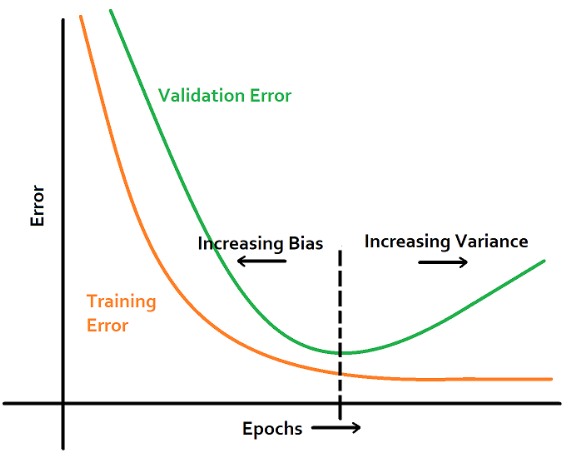

In [109]:
xtrain.shape[1]

18

In [110]:
ytrain_pre.shape[1]

4

In [111]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

In [112]:
# Initialize the model
model=Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Dense layer 1
model.add(Dense(units=32, activation="relu"))
# Add dropout layer 1
model.add(Dropout(rate=0.3))

# Add Dense layer 2
model.add(Dense(units=16 ,activation="relu"))
# Add dropout layer 2
model.add(Dropout(rate=0.2))

# for multiclass classification softmax activation
model.add(Dense(units=ytrain_pre.shape[1], activation="softmax"))

In [113]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,204 (4.70 KB)

 Trainable params: 1,204 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [115]:
es = EarlyStopping(patience=10)

In [116]:
hist = model.fit(xtrain, ytrain_pre, validation_split=0.2, epochs=200, callbacks = [es])


Epoch 1/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4610 - loss: 1.2194 - val_accuracy: 0.8542 - val_loss: 0.5290
Epoch 2/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7698 - loss: 0.6518 - val_accuracy: 0.8736 - val_loss: 0.3854
Epoch 3/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8161 - loss: 0.5220 - val_accuracy: 0.8897 - val_loss: 0.3247
Epoch 4/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8410 - loss: 0.4628 - val_accuracy: 0.8963 - val_loss: 0.2961
Epoch 5/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8561 - loss: 0.4107 - val_accuracy: 0.9020 - val_loss: 0.2735
Epoch 6/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8628 - loss: 0.3922 - val_accuracy: 0.9096 - val_loss: 0.2566
Epoch 7/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8729 - loss: 0.3588 - val_accuracy: 0.9086 - val_loss: 0.2503
Epoch 8/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8777 - loss: 0.3608 - val_accu

### Check learning curve

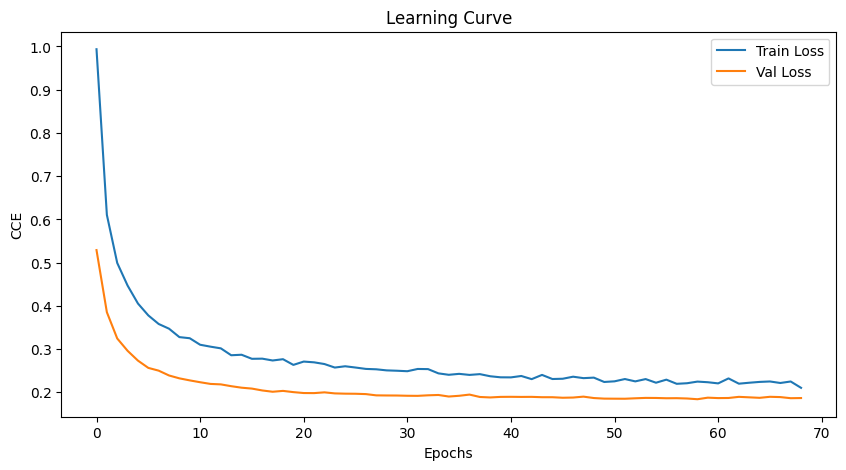

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history["loss"], label= "Train Loss")
plt.plot(hist.history["val_loss"],label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("CCE")
plt.title("Learning Curve")
plt.legend()
plt.show()

### Model Evaluation

In [118]:
model.evaluate(xtrain,ytrain_pre)

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9148 - loss: 0.1778


[0.17860820889472961, 0.9147727489471436]

In [119]:
model.evaluate(xtest,ytest_pre)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9100 - loss: 0.2199


[0.21259190142154694, 0.9087121486663818]

In [52]:
yprob_train = model.predict(xtrain)
yprob_train

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[9.6768299e-03, 9.8946816e-01, 1.4894882e-04, 7.0611155e-04],
       [3.4370830e-03, 9.9642652e-01, 8.7058841e-05, 4.9310787e-05],
       [5.3605962e-19, 4.3703087e-24, 2.4605578e-20, 1.0000000e+00],
       ...,
       [9.9998927e-01, 2.0173911e-07, 1.5575660e-06, 8.9230707e-06],
       [7.1790522e-01, 1.6381711e-01, 7.8171276e-02, 4.0106338e-02],
       [9.0150349e-03, 9.9051547e-01, 2.0529318e-04, 2.6431834e-04]],
      dtype=float32)

In [120]:
ytrain_pre.columns

Index(['Weather Type_Cloudy', 'Weather Type_Rainy', 'Weather Type_Snowy',
       'Weather Type_Sunny'],
      dtype='object')

In [121]:
classes = [i.split("_")[1] for i in ytrain_pre.columns]
classes

['Cloudy', 'Rainy', 'Snowy', 'Sunny']

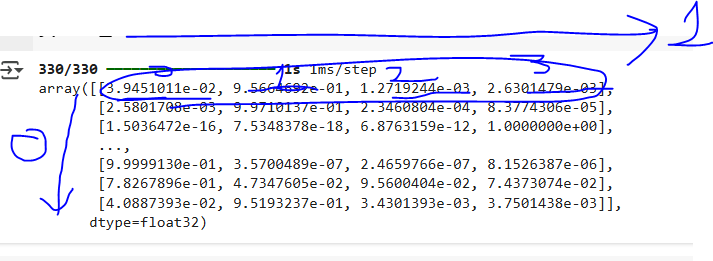

In [122]:
import numpy as np
yprob_index =np.argmax(yprob_train,axis=1)
yprob_index

array([1, 1, 3, ..., 0, 0, 1])

In [123]:
ypred_train = [classes[i] for i in yprob_index]
ypred_train[0:5]

['Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy']

In [124]:
ytrain.head()

,Weather Type
3958,Rainy
2239,Rainy
3608,Sunny
6848,Rainy
6119,Cloudy


In [125]:
def predict_result(model, x):
  yprob = model.predict(x)
  yprob_index = np.argmax(yprob, axis=1)
  ypred = [classes[i] for i in yprob_index]
  return ypred, yprob


In [126]:
ypred_test, yprob_test = predict_result(model, xtest)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [127]:
ypred_test[0:5]

['Sunny', 'Sunny', 'Sunny', 'Snowy', 'Sunny']

In [128]:
ytest.head()

,Weather Type
4111,Sunny
10607,Sunny
7372,Sunny
11786,Snowy
12227,Sunny


### plot the confusion matrix

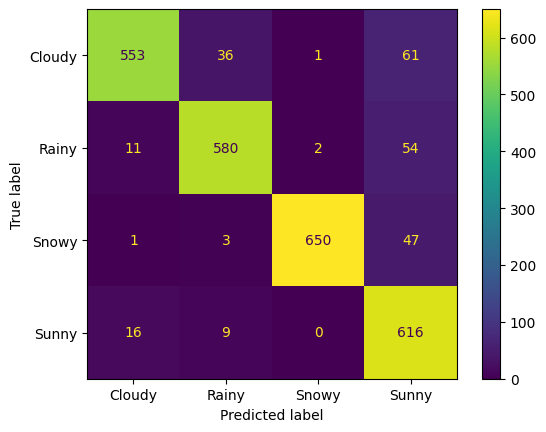

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)


In [130]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      Cloudy       0.95      0.85      0.90       651
       Rainy       0.92      0.90      0.91       647
       Snowy       1.00      0.93      0.96       701
       Sunny       0.79      0.96      0.87       641

    accuracy                           0.91      2640
   macro avg       0.92      0.91      0.91      2640
weighted avg       0.92      0.91      0.91      2640



### Because F1 macro > 0.8 hence model is good for out of sample prediction

### step 8 - out of sample of prediction

In [131]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_weather.csv"
xnew = pd.read_csv(url2)
xnew.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland


In [132]:
xnew.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),1
Cloud Cover,1
Atmospheric Pressure,0
UV Index,0
Season,2
Visibility (km),1
Location,2


In [133]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [134]:
xnew_pre=pre.transform(xnew)
xnew_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
0,-1.100192,-0.035201,0.892792,0.386773,-0.561530,-1.038715,-1.027154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,5.054302,1.896115,0.748042,0.918933,0.246574,1.813646,0.455922,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.007338,0.360966,0.386166,-0.583634,0.307330,-0.001493,0.752538,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.165218,1.499948,1.254668,0.136346,0.184743,-1.038715,-0.582231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.797923,-2.164601,-0.265211,-1.491435,0.482338,0.517118,-0.137308,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [135]:
preds, probs = predict_result(model, xnew_pre)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [136]:
preds[0:5]

['Snowy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny']

In [137]:
probs[0:5]

array([[1.07684839e-09, 7.20256566e-08, 9.99999881e-01, 4.20000212e-08],
       [7.95154274e-02, 1.97314424e-03, 4.56505129e-03, 9.13946450e-01],
       [9.93489504e-01, 3.06224730e-03, 4.40377742e-04, 3.00795236e-03],
       [2.40867562e-03, 9.97404397e-01, 8.05005693e-05, 1.06357584e-04],
       [3.88129934e-04, 1.07742540e-06, 1.51298673e-05, 9.99595702e-01]],
      dtype=float32)

In [138]:
classes

['Cloudy', 'Rainy', 'Snowy', 'Sunny']

In [139]:
xnew["Weather Type"] = preds
xnew[classes] = probs

In [140]:
xnew=xnew.round(4)

In [141]:
xnew

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Cloudy,Rainy,Snowy,Sunny
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain,Snowy,0.0000,0.0000,1.0000,0.0000
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain,Sunny,0.0795,0.0020,0.0046,0.9139
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland,Cloudy,0.9935,0.0031,0.0004,0.0030
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland,Rainy,0.0024,0.9974,0.0001,0.0001
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland,Sunny,0.0004,0.0000,0.0000,0.9996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,27,59,9.5,41.0,overcast,1001.39,4,Spring,8.0,mountain,Cloudy,0.9926,0.0057,0.0003,0.0013
96,73,82,47.0,107.0,overcast,1002.73,0,Winter,0.5,mountain,Rainy,0.0048,0.9951,0.0000,0.0000
97,2,60,3.0,70.0,overcast,994.19,0,Winter,2.0,mountain,Snowy,0.0000,0.0000,1.0000,0.0000
98,33,44,1.5,11.0,clear,1011.95,7,Summer,8.5,inland,Sunny,0.0000,0.0000,0.0000,1.0000


In [142]:

xnew["Weather Type"].value_counts()


,count
Weather Type,
Snowy,26
Sunny,26
Rainy,26
Cloudy,22


In [143]:

xnew.to_csv("WResults.csv", index=False)


### Save the model

In [144]:
model.save("Weathermodel.keras")

### Load the model

In [146]:

from keras.models import load_model
m = load_model("/content/weathermodel.keras")
m.summary()

ValueError: File not found: filepath=/content/weathermodel.keras. Please ensure the file is an accessible `.keras` zip file.